# Handout #17 - Part B: Model Selection Methods

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## (Continued) Example:  Texas School Districts
[Part A](https://colab.research.google.com/drive/1pq9szrQqkVpezRy_89oOvLQifXVX1FUY?usp=share_link) of this handout includes much of the data preparation needed to model the total actual instructional expenditures per pupil.

<br>

Google Sheet - Variables: https://docs.google.com/spreadsheets/d/1RFe7CwHJNdDbf4cJPjaMZhstBidZOIc0PtELtndtFkQ/edit?usp=share_link

Data Source: https://rptsvr1.tea.texas.gov/perfreport/snapshot/download.html

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



<p align='center'><img src="https://drive.google.com/uc?export=view&id=1n8hQioyDMksVNA1hBq4yJ2E5dNv8WlqK" width="75%" height="75%"></img></p>

## Getting the Prepared Data

Let's begin by loading the tidyverse package into the current R session.

In [1]:
#load tidyverse package
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Let's begin by reading in the prepared data file from Part A of this handout.

In [ ]:
#Reading in the prepared data from this COLAB session
#Note:  Data must be manually uploaded to the sample_data folder
#TexasSchoolDistricts_Snapshot_Modeling <- read_csv('sample_data/TexasSchoolDistricts_Snapshot_Modeling.csv')

# Reading in the prepared data from the statsclass server
TexasSchoolDistricts_Snapshot_Modeling <- read_csv("http://www.StatsClass.org/stat360/Datasets/TexasSchoolDistricts_Snapshot_Modeling.csv")

ERROR: ignored

Let's begin by taking a look at the prepared data.

In [ ]:
options(repr.matrix.max.rows=60, repr.matrix.max.cols=75)

dim(TexasSchoolDistricts_Snapshot_Modeling)
head(TexasSchoolDistricts_Snapshot_Modeling)

options(repr.matrix.max.rows=60, repr.matrix.max.cols=20)

[1] 1201   72

...1 DISTNAME      DISTRICT DZCNTYNM     REGION DZRATING DPETECOP DPETLEPP
1 1    CAYUGA ISD    001902   001 ANDERSON 07     A        42.6      0.2    
2 2    ELKHART ISD   001903   001 ANDERSON 07     A        58.1      2.3    
3 3    FRANKSTON ISD 001904   001 ANDERSON 07     B        53.7      2.9    
4 4    NECHES ISD    001906   001 ANDERSON 07     A        47.8      1.9    
5 5    PALESTINE ISD 001907   001 ANDERSON 07     B        74.9     17.8    
6 6    WESTWOOD ISD  001908   001 ANDERSON 07     B        61.5      5.8    
  DPETSPEP DPETBILP DPETVOCP DPETGIFP DA0AT18R DA0912DR18R DAGC4X18R
1 14.9      0.2     30.9     8.5      96.5     0.0         100.0    
2 10.7      2.1     32.1     3.6      96.4     0.0          94.7    
3 11.5      2.9     32.0     8.8      95.4     0.4          96.7    
4  8.7      1.9     43.7     6.0      95.9     0.9          95.8    
5 10.7     16.5     31.6     2.9      95.3     0.0          96.8    
6 12.3      5.5     26.7     2.4      95.7     0.4          99.0    
  DDA00A001S19R DDA00A001219R DDA00A001319R DDA00AR01S19R DDA00AR01219R
1 85            61            29            82            60           
2 84            56            27            79            51           
3 81            53            25            78            49           
4 86            52            22            87            50           
5 72            42            18            67            39           
6 67            36            14            62            35           
  DDA00AR01319R DDA00AW01S19R DDA00AW01219R DDA00AW01319R DDA00AM01S19R
1 29            80            52            18            89           
2 23            84            54            17            89           
3 21            79            47            11            83           
4 19            68            24             8            92           
5 15            58            28            10            80           
6 12            56            29            10            71           
  DDA00AM01219R DDA00AM01319R DDA00AC01S19R DDA00AC01219R DDA00AC01319R
1 70            36            87            61            25           
2 60            31            85            59            25           
3 56            28            87            61            26           
4 56            23            86            63            38           
5 49            24            74            43            16           
6 37            16            75            42            16           
  DDA00AS01S19R DDA00AS01219R DDA00AS01319R DDE00A001S19R DDE00A001219R
1 80            47            20            80            53           
2 86            65            40            77            43           
3 85            58            40            75            42           
4 83            56            17            82            42           
5 73            41            19            67            36           
6 71            40            16            63            32           
  DDE00A001319R DA0CT18R DA0CC18R DA0CSA18R DA0CAA18R DPSATOFC DPSTTOFC
1 25            38.5     53.3     1109      22.2       97.4     49.7   
2 18            44.6     48.5     1096        NA      185.2    106.0   
3 18            62.1     44.4     1070      22.8      129.6     64.5   
4 15            50.0     45.5     1124      20.6       63.9     33.5   
5 14            36.6     50.6     1088      22.8      491.7    254.3   
6 12            40.6     31.7     1023      20.5      247.7    123.5   
  DPSCTOFP DPSSTOFP DPSUTOFP DPSTTOFP DPSETOFP DPSXTOFP DPSCTOSA DPSSTOSA
1 3.1      3.3      4.6      51.0     11.5     26.4      63570   73109   
2 1.1      2.7      3.8      57.2     15.9     19.3      95078   69437   
3 2.3      3.2      4.2      49.7     16.2     24.4      90593   67223   
4 7.1      4.7      3.1      52.4     12.5     20.2      51336   73626   
5 2.0      3.7      5.7      51.7     16.6     20.3      92301   64623   
6 0.8      3.3  

## Dealing with Missing Data

**Missingness in the Response**

The presence of missing data when building a predictive model can be problematic.  Consider the following schmatic -- the response is missing (NA) for two school districts -- FRANKSTON ISD and SLOCUM ISD.  As a result, these two school districts must be excluded in the model building process.


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1iqjG2kx1ENeq5u80PAsrggOO9nor5YRy" width="50%" height="50%"></img></p>

**Missingness in a Single Predictor**

Consider the following schmatic -- here all missingness is present in only a single predictor variable. In this situation, if VAR4 were to be included in the model building process, then only three school districts would be used to build the predictive model (CAYUGA ISD, FRANKSTON ISD, and PINEYWOODS ISD).  If one excludes VAR4 from consideration in the model building process, then all school disticts can be used to build the predictive model.


<p align='center'><img src="https://drive.google.com/uc?export=view&id=13sM3SqFJwX-nZy5XlK01nqA-q5ldStnK" width="50%" height="50%"></img></p>


**Missingness at Random**

The most common form of missingness is missingess at random. In the following schematic, the level of missingness is low (2 out of 50 observations).  In this situation, removing the school districts that have missing values for any of the variables is (in most cases) an acceptable approach. Here, school disticts PALESTINE ISD and HUDSON ISD would be excluded in the model building process.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1tK2X10tbEQCR6Hc5NOPTtv1NH-_jKqOu" width="50%" height="50%"></img></p>



In the following schematic, the level of missingness is somewhat high (7 out of 50 observations).  In this situation, removing the school districts that have missing values would result in only three school districts being used to build the predictive model. The missingess in this schematic adversely affects our abiliy to build a predictive model.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1lJT5z03ohJVHpSAdE5AlKpZyokhCgLPZ" width="50%" height="50%"></img></p>



**Comment**:  One way to deal with the missingness is use **imputation**.   Imputation is a statistical method that is used to "fill-in" values for missing data.  [Wiki Page for Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics))



---



The **na.omit()** function can be used to remove all observerations that have any missingness.  If one were to remove all school districts that have any missingness, then the number of school districts that would be available for the model building process is reduced to less than 700 (down from over 1200).

In [ ]:
#Using na.omit() to remove observations that have any missing values
dim(na.omit(TexasSchoolDistricts_Snapshot_Modeling))

[1] 699  72

Next, let's consider a less aggressive approach to getting rid of missingness in our data.  The following code chunk determines how many school districts have missing values for all variables in the data.

In [ ]:
options(repr.matrix.max.rows=60, repr.matrix.max.cols=75)

#Getting a tally of missingness for all variables
(TexasSchoolDistricts_Snapshot_Modeling
   %>% summarise_all(~ sum(is.na(.)))
) -> NA_Tally
NA_Tally

options(repr.matrix.max.rows=60, repr.matrix.max.cols=20)

...1 DISTNAME DISTRICT DZCNTYNM REGION DZRATING DPETECOP DPETLEPP DPETSPEP
1 0    0        0        0        0      0        0        0        0       
  DPETBILP DPETVOCP DPETGIFP DA0AT18R DA0912DR18R DAGC4X18R DDA00A001S19R
1 0        0        0        7        113         149       2            
  DDA00A001219R DDA00A001319R DDA00AR01S19R DDA00AR01219R DDA00AR01319R
1 2             2             3             3             3            
  DDA00AW01S19R DDA00AW01219R DDA00AW01319R DDA00AM01S19R DDA00AM01219R
1 37            37            37            5             5            
  DDA00AM01319R DDA00AC01S19R DDA00AC01219R DDA00AC01319R DDA00AS01S19R
1 5             13            13            13            47           
  DDA00AS01219R DDA00AS01319R DDE00A001S19R DDE00A001219R DDE00A001319R
1 47            47            10            10            10           
  DA0CT18R DA0CC18R DA0CSA18R DA0CAA18R DPSATOFC DPSTTOFC DPSCTOFP DPSSTOFP
1 143      182      402       260       2        2        2        2       
  DPSUTOFP DPSTTOFP DPSETOFP DPSXTOFP DPSCTOSA DPSSTOSA DPSUTOSA DPSTTOSA
1 2        2        2        2        10       14       62       4       
  DPSAMIFP DPSAKIDR DPSTKIDR DPST05FP DPSTEXPA DPSTADFP DPSTURNR DPSTREFP
1 2        2        4        2        2        2        9        2       
  DPSTSPFP DPSTCOFP DPSTBIFP DPSTVOFP DPSTGOFP DPFVTOTK DPFTADPR DPFEAINSK
1 2        2        2        2        2        6        6        6        
  DISTSIZE COMMTYPE PROPWLTH TAXRATE
1 0        0        0        0

The following code chunk identifies the variables that have more than 100 school districts with missingness.  These particular predictor variables will be excluded from consideration in the model building process.

In [ ]:
#Identify the predictor variables that have a larger number of missing values
(NA_Tally
  %>% select_if(. > 100)
)

DA0912DR18R DAGC4X18R DA0CT18R DA0CC18R DA0CSA18R DA0CAA18R
1 113         149       143      182      402       260

The predictor variable identifed above will be excluded from consideration in the model building process.  The na.omit() function is used to remove school districts that continue to have missing values present for the remaining predictor variables.

In [ ]:
(TexasSchoolDistricts_Snapshot_Modeling
  %>% select(-c(DA0912DR18R,DAGC4X18R,DA0CT18R,DA0CC18R,DA0CSA18R,DA0CAA18R))
  %>% na.omit()
) -> TexasSchoolDistricts_Snapshot_Modeling_Reduced

There are about 1075 school districts remaining after the missing values are removed from the remaining predictor variables.

In [ ]:
dim(TexasSchoolDistricts_Snapshot_Modeling_Reduced)

[1] 1074   66

## Building an Initial (Full) Model

The following code chunk will fit an initial model that includes all remaining predictor variables. This model is likely to be overly complicated, i.e. not parsimonous.  

<u>**Definition**</u>: A **parsimonious model** is a model that accomplishes the desired level of explanation or prediction with as few predictor variables as possible..



In [ ]:
LinearModel_DPFEAINSK_Full <- lm(DPFEAINSK ~
                              DPETECOP +
                              DPETLEPP +
                              DPETSPEP +
                              DPETBILP +
                              DPETVOCP +
                              DPETGIFP +
                              DA0AT18R +
                              #DA0912DR18R +
                              #DAGC4X18R +
                              DDA00A001S19R +
                              DDA00A001219R +
                              DDA00A001319R +
                              DDA00AR01S19R +
                              DDA00AR01219R +
                              DDA00AR01319R +
                              DDA00AW01S19R +
                              DDA00AW01219R +
                              DDA00AW01319R +
                              DDA00AM01S19R +
                              DDA00AM01219R +
                              DDA00AM01319R +
                              DDA00AC01S19R +
                              DDA00AC01219R +
                              DDA00AC01319R +
                              DDA00AS01S19R +
                              DDA00AS01219R +
                              DDA00AS01319R +
                              DDE00A001S19R +
                              DDE00A001219R +
                              DDE00A001319R +
                              #DA0CT18R +
                              #DA0CC18R +
                              #DA0CSA18R +
                              #DA0CAA18R +
                              DPSATOFC +
                              DPSTTOFC +
                              DPSCTOFP +
                              DPSSTOFP +
                              DPSUTOFP +
                              DPSTTOFP +
                              DPSETOFP +
                              DPSXTOFP +
                              DPSCTOSA +
                              DPSSTOSA +
                              DPSUTOSA +
                              DPSTTOSA +
                              DPSAMIFP +
                              DPSAKIDR +
                              DPSTKIDR +
                              DPST05FP +
                              DPSTEXPA +
                              DPSTADFP +
                              DPSTURNR +
                              DPSTREFP +
                              DPSTSPFP +
                              DPSTCOFP +
                              DPSTBIFP +
                              DPSTVOFP +
                              DPSTGOFP +
                              DPFVTOTK +
                              DPFTADPR,
                           data = TexasSchoolDistricts_Snapshot_Modeling_Reduced
                           )

Next, getting a summary of the initial (full) model.

In [ ]:
summary(LinearModel_DPFEAINSK_Full)


Call:
lm(formula = DPFEAINSK ~ DPETECOP + DPETLEPP + DPETSPEP + DPETBILP + 
    DPETVOCP + DPETGIFP + DA0AT18R + DDA00A001S19R + DDA00A001219R + 
    DDA00A001319R + DDA00AR01S19R + DDA00AR01219R + DDA00AR01319R + 
    DDA00AW01S19R + DDA00AW01219R + DDA00AW01319R + DDA00AM01S19R + 
    DDA00AM01219R + DDA00AM01319R + DDA00AC01S19R + DDA00AC01219R + 
    DDA00AC01319R + DDA00AS01S19R + DDA00AS01219R + DDA00AS01319R + 
    DDE00A001S19R + DDE00A001219R + DDE00A001319R + DPSATOFC + 
    DPSTTOFC + DPSCTOFP + DPSSTOFP + DPSUTOFP + DPSTTOFP + DPSETOFP + 
    DPSXTOFP + DPSCTOSA + DPSSTOSA + DPSUTOSA + DPSTTOSA + DPSAMIFP + 
    DPSAKIDR + DPSTKIDR + DPST05FP + DPSTEXPA + DPSTADFP + DPSTURNR + 
    DPSTREFP + DPSTSPFP + DPSTCOFP + DPSTBIFP + DPSTVOFP + DPSTGOFP + 
    DPFVTOTK + DPFTADPR, data = TexasSchoolDistricts_Snapshot_Modeling_Reduced)

Residuals:
    Min      1Q  Median      3Q     Max 
-4117.9  -373.3   -77.9   266.6  9119.1 

Coefficients:
                Estimate Std. Error t va

From the summary output, one can observe that several of the 55 predictors in this model are not needed, i.e. their corrsponding $Pr(>|t|)$ values are greater than $0.05$.  The following code chunk identifies which predictors appear to be not statistically useful.  

In [ ]:
(data.frame(anova(LinearModel_DPFEAINSK_Full))
  %>% filter(Pr..F. > 0.05)
)

Df Sum.Sq       Mean.Sq      F.value     Pr..F.    
DPETBILP      1    28774.6564   28774.6564 0.054236062 0.81589646
DDA00A001219R 1   888100.3538  888100.3538 1.673940595 0.19602502
DDA00AR01219R 1    71807.0831   71807.0831 0.135345956 0.71302879
DDA00AR01319R 1   714422.0314  714422.0314 1.346582101 0.24614859
DDA00AW01S19R 1   131969.8184  131969.8184 0.248744002 0.61806860
DDA00AM01S19R 1    88266.3491   88266.3491 0.166369290 0.68344467
DDA00AM01219R 1  1553843.7636 1553843.7636 2.928770541 0.08731835
DDA00AM01319R 1   558338.5829  558338.5829 1.052387397 0.30520158
DDA00AC01S19R 1  1091544.2447 1091544.2447 2.057402876 0.15177524
DDA00AC01219R 1   541896.6496  541896.6496 1.021396733 0.31242808
DDA00AS01S19R 1  1134487.7158 1134487.7158 2.138345102 0.14396542
DDA00AS01219R 1    44112.8319   44112.8319 0.083146302 0.77313677
DDA00AS01319R 1  1139684.1798 1139684.1798 2.148139684 0.14305154
DDE00A001219R 1   305563.6982  305563.6982 0.575943334 0.44808249
DPSTTOFC      1    66527.4974   66527.4974 0.125394701 0.72332892
DPSETOFP      1   421977.1593  421977.1593 0.795365855 0.37269327
DPSXTOFP      1      196.5960     196.5960 0.000370555 0.98464560
DPST05FP      1      662.2713     662.2713 0.001248286 0.97182266
DPSTADFP      1   242054.1467  242054.1467 0.456237024 0.49954127
DPSTURNR      1  1837834.2923 1837834.2923 3.464051574 0.06300455
DPSTREFP      1   199826.9912  199826.9912 0.376644949 0.53954140
DPSTSPFP      1   437374.5766  437374.5766 0.824387757 0.36411529
DPSTCOFP      1   362830.6862  362830.6862 0.683883316 0.40844651
DPSTVOFP      1  1929082.2255 1929082.2255 3.636040718 0.05682253
DPSTGOFP      1  1089528.7808 1089528.7808 2.053604018 0.15215339

The following snipit of code can be used to identify the number of observations and the number of predictors from an lm() object.

In [ ]:
#Getting the number of observations from an lm() object
nobs(LinearModel_DPFEAINSK_Full)

#Getting the number of predictor variables from an lm() object
length(coef(LinearModel_DPFEAINSK_Full)) - 1       # -1 here because of the intercept

[1] 1074

[1] 55

## Getting the $AIC$ and $BIC$ Metrics

The most common model metrics used by statisticians for model building purposes are Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC).  These metrics are basically functions of the sum-of-squared residuals (i.e. represented here by $-2 *log \space likelihood).$ These metrics also include a penalty term that takes into consideration the number of parameters being estimated by the model (this penalty term is also known as a model complexity term).

$AIC = -2 * log\space likelihood + ( \space p \space x \space 2 \space)$

$BIC = -2 * log \space likelihood + ( \space p \space x \space log(n) \space )$


Getting the $AIC$ value for the initial (full) model.

In [ ]:
#Getting the AIC for the model
extractAIC(LinearModel_DPFEAINSK_Full, k=2)

[1]    56.00 14211.59

Getting the $BIC$ value for the initial (full) model.

In [ ]:
#Getting the BIC for the model
extractAIC(LinearModel_DPFEAINSK_Full, k=log(1074))

[1]    56.00 14490.42

## Backward Selection

The **step()** function in R allows will allow one to conduct forward, backward, and stepwise model selection.

* Forward - start with an empty model and sequentially add predictors to the model
* Backward - start with a full model and sequentially remove predictors from the model
* Stepwise - upon the addition of a predictor, check to see if any existing predictors should be removed

* The value of $k$ is used to identify which criterion should be used
 > $k=2$ for $AIC$

 > $k=log(n)$ for $BIC$

Let's first consider $direction = backward$  and $AIC$ as the metric to be minimized.

In [ ]:
LinearModel_DPFEAINSK_Backward_AIC <- step(LinearModel_DPFEAINSK_Full, direction="backward", k=2)

Start:  AIC=14211.59
DPFEAINSK ~ DPETECOP + DPETLEPP + DPETSPEP + DPETBILP + DPETVOCP + 
    DPETGIFP + DA0AT18R + DDA00A001S19R + DDA00A001219R + DDA00A001319R + 
    DDA00AR01S19R + DDA00AR01219R + DDA00AR01319R + DDA00AW01S19R + 
    DDA00AW01219R + DDA00AW01319R + DDA00AM01S19R + DDA00AM01219R + 
    DDA00AM01319R + DDA00AC01S19R + DDA00AC01219R + DDA00AC01319R + 
    DDA00AS01S19R + DDA00AS01219R + DDA00AS01319R + DDE00A001S19R + 
    DDE00A001219R + DDE00A001319R + DPSATOFC + DPSTTOFC + DPSCTOFP + 
    DPSSTOFP + DPSUTOFP + DPSTTOFP + DPSETOFP + DPSXTOFP + DPSCTOSA + 
    DPSSTOSA + DPSUTOSA + DPSTTOSA + DPSAMIFP + DPSAKIDR + DPSTKIDR + 
    DPST05FP + DPSTEXPA + DPSTADFP + DPSTURNR + DPSTREFP + DPSTSPFP + 
    DPSTCOFP + DPSTBIFP + DPSTVOFP + DPSTGOFP + DPFVTOTK + DPFTADPR

                Df Sum of Sq       RSS   AIC
- DDA00AS01219R  1       863 540095394 14210
- DPSTADFP       1      3330 540097861 14210
- DPSTTOFC       1      3552 540098083 14210
- DPSATOFC       1      3714

Changing $k=2$ to $k=log(1074)$ will imply that the $BIC$ metric is used in the model selection process.

In [ ]:
LinearModel_DPFEAINSK_Backward_BIC <- step(LinearModel_DPFEAINSK_Full, direction="backward", k=log(1074), trace=FALSE)



---



The following code snipts can be used to identify which predictors are present in the resulting model when using $direction = backward$ with $AIC$ as the metric.

In [ ]:
#Getting the names of the predictors from the model
names(coef(LinearModel_DPFEAINSK_Backward_AIC))

#Getting the number of predictors
length(names(coef(LinearModel_DPFEAINSK_Backward_AIC)))-1

[1] "(Intercept)"   "DPETECOP"      "DPETSPEP"      "DPETVOCP"     
 [5] "DDA00A001S19R" "DDA00A001319R" "DDA00AR01319R" "DDA00AW01219R"
 [9] "DDA00AW01319R" "DDA00AM01S19R" "DDA00AM01219R" "DDA00AS01S19R"
[13] "DDA00AS01319R" "DDE00A001219R" "DDE00A001319R" "DPSSTOFP"     
[17] "DPSUTOFP"      "DPSTTOFP"      "DPSETOFP"      "DPSXTOFP"     
[21] "DPSCTOSA"      "DPSSTOSA"      "DPSTTOSA"      "DPSAMIFP"     
[25] "DPSAKIDR"      "DPSTKIDR"      "DPSTEXPA"      "DPSTURNR"     
[29] "DPSTREFP"      "DPSTSPFP"      "DPSTCOFP"      "DPSTBIFP"     
[33] "DPSTGOFP"      "DPFVTOTK"      "DPFTADPR"

[1] 34

Likewise for the model with $direction = backward$ and $BIC$ as the metric being minimized.

In [ ]:
#Getting the names of the predictors from the model
names(coef(LinearModel_DPFEAINSK_Backward_BIC))

#Getting the number of predictors
length(names(coef(LinearModel_DPFEAINSK_Backward_BIC)))-1

[1] "(Intercept)"   "DPETSPEP"      "DDA00A001319R" "DDA00AR01319R"
 [5] "DDA00AM01S19R" "DDA00AM01219R" "DDA00AS01319R" "DPSSTOFP"     
 [9] "DPSUTOFP"      "DPSETOFP"      "DPSXTOFP"      "DPSCTOSA"     
[13] "DPSTTOSA"      "DPSAMIFP"      "DPSAKIDR"      "DPFVTOTK"     
[17] "DPFTADPR"

[1] 16

Assuming that the smaller of the two models is a subset of the larger, the $BIG \space F-Test$ can be used to determine whether or not the larger of the two models is *statistically* better than the smaller model.

In [ ]:
anova(LinearModel_DPFEAINSK_Backward_BIC, LinearModel_DPFEAINSK_Backward_AIC)

Res.Df RSS       Df Sum of Sq F        Pr(>F)      
1 1057   576708028 NA       NA        NA           NA
2 1039   544574085 18 32133943  3.406043 2.028022e-06

The resulting $p-value$ from the $BIG \space F-Test$ is less than $0.05$; thus, the model with the additional predictors variables is deemed statistically better.

Getting a summary for the model from the $direction=backward$ with $AIC$ metric being used.

In [ ]:
summary(LinearModel_DPFEAINSK_Backward_AIC)

Getting a summary for the model from the $direction=backward$ with $BIC$ metric being used.

In [ ]:
summary(LinearModel_DPFEAINSK_Backward_BIC)

## Forward Selection

Forward selection starts with an *empty* model, i.e. a model that contains an intercept term only.  This type of model can be fit in R using the $y \sim 1$ syntax.

In [ ]:
LinearModel_DPFEAINSK_Empty <- lm(DPFEAINSK ~ 1, data=TexasSchoolDistricts_Snapshot_Modeling_Reduced)

A list of all potential predictor variables is needed when using $direction=forward$.  

Note: If the data.frame being passed into the lm() object only contains the response and potential predictor variable, then the $y \sim .$ syntax can be used instead of the syntax provided here.  Unfortantely, the data.frame used here contains demographic variables, then this short-hand syntax cannot be used in out situation.

In [ ]:
LinearModel_DPFEAINSK_Forward_AIC <- step(LinearModel_DPFEAINSK_Empty, .~. +
                                          DPETECOP + DPETLEPP + DPETSPEP + DPETBILP + DPETVOCP +
                                          DPETGIFP + DA0AT18R + DDA00A001S19R + DDA00A001219R +
                                          DDA00A001319R + DDA00AR01S19R + DDA00AR01219R + DDA00AR01319R +
                                          DDA00AW01S19R + DDA00AW01219R + DDA00AW01319R + DDA00AM01S19R +
                                          DDA00AM01219R + DDA00AM01319R + DDA00AC01S19R + DDA00AC01219R +
                                          DDA00AC01319R + DDA00AS01S19R + DDA00AS01219R + DDA00AS01319R +
                                          DDE00A001S19R + DDE00A001219R + DDE00A001319R +
                                          DPSATOFC + DPSTTOFC + DPSCTOFP + DPSSTOFP + DPSUTOFP +
                                          DPSTTOFP + DPSETOFP + DPSXTOFP + DPSCTOSA + DPSSTOSA +
                                          DPSUTOSA + DPSTTOSA + DPSAMIFP + DPSAKIDR + DPSTKIDR +
                                          DPST05FP + DPSTEXPA + DPSTADFP + DPSTURNR + DPSTREFP +
                                          DPSTSPFP + DPSTCOFP + DPSTBIFP + DPSTVOFP + DPSTGOFP +
                                          DPFVTOTK + DPFTADPR,
                                          direction="forward", k=2)

Again, changing $k=2$ to $k=log(1074)$ allows for the $BIC$ metric to be used when obtaining the best model.

In [ ]:
LinearModel_DPFEAINSK_Forward_BIC <- step(LinearModel_DPFEAINSK_Empty, .~. +
                                          DPETECOP + DPETLEPP + DPETSPEP + DPETBILP + DPETVOCP +
                                          DPETGIFP + DA0AT18R + DDA00A001S19R + DDA00A001219R +
                                          DDA00A001319R + DDA00AR01S19R + DDA00AR01219R + DDA00AR01319R +
                                          DDA00AW01S19R + DDA00AW01219R + DDA00AW01319R + DDA00AM01S19R +
                                          DDA00AM01219R + DDA00AM01319R + DDA00AC01S19R + DDA00AC01219R +
                                          DDA00AC01319R + DDA00AS01S19R + DDA00AS01219R + DDA00AS01319R +
                                          DDE00A001S19R + DDE00A001219R + DDE00A001319R +
                                          DPSATOFC + DPSTTOFC + DPSCTOFP + DPSSTOFP + DPSUTOFP +
                                          DPSTTOFP + DPSETOFP + DPSXTOFP + DPSCTOSA + DPSSTOSA +
                                          DPSUTOSA + DPSTTOSA + DPSAMIFP + DPSAKIDR + DPSTKIDR +
                                          DPST05FP + DPSTEXPA + DPSTADFP + DPSTURNR + DPSTREFP +
                                          DPSTSPFP + DPSTCOFP + DPSTBIFP + DPSTVOFP + DPSTGOFP +
                                          DPFVTOTK + DPFTADPR,
                                          direction="forward", k=log(1074), trace=FALSE)

The following code snipts can be used to identify which predictors are present in the resulting model when using  $𝑑𝑖𝑟𝑒𝑐𝑡𝑖𝑜𝑛=forward$  for both the $𝐴𝐼𝐶$ and $BIC$ metrics.

In [ ]:
#Getting the names of the predictors from the model
names(coef(LinearModel_DPFEAINSK_Forward_AIC))

#Getting the number of predictors
length(names(coef(LinearModel_DPFEAINSK_Forward_AIC)))-1

[1] "(Intercept)"   "DPSTKIDR"      "DPSTTOSA"      "DPSAMIFP"     
 [5] "DPSAKIDR"      "DPFTADPR"      "DPSCTOFP"      "DPFVTOTK"     
 [9] "DPETSPEP"      "DPSCTOSA"      "DPSXTOFP"      "DDE00A001219R"
[13] "DDE00A001319R" "DDA00AW01219R" "DPSTEXPA"      "DPSTURNR"     
[17] "DPETECOP"      "DPSTBIFP"      "DDA00AW01319R" "DDA00AS01S19R"
[21] "DDA00AS01319R" "DPETGIFP"      "DDA00AC01319R" "DPSTVOFP"     
[25] "DPETVOCP"

[1] 24

In [ ]:
#Getting the names of the predictors from the model
names(coef(LinearModel_DPFEAINSK_Forward_BIC))

#Getting the number of predictors
length(names(coef(LinearModel_DPFEAINSK_Forward_BIC)))-1

[1] "(Intercept)" "DPSTKIDR"    "DPSTTOSA"    "DPSAMIFP"    "DPSAKIDR"   
 [6] "DPFTADPR"    "DPSCTOFP"    "DPFVTOTK"    "DPETSPEP"    "DPSCTOSA"   
[11] "DPSXTOFP"

[1] 10

Assuming that the smaller of the two models is a subset of the larger, the $BIG \space F-Test$ can be used to determine whether or not the larger of the two models is statistically better than the smaller model.

In [ ]:
anova(LinearModel_DPFEAINSK_Forward_BIC, LinearModel_DPFEAINSK_Forward_AIC)

Res.Df RSS       Df Sum of Sq F        Pr(>F)      
1 1063   591803347 NA       NA        NA           NA
2 1049   555591938 14 36211409  4.883565 7.879653e-09

The resulting $p-value$ from the $BIG \space F-Test$ is less than $0.05$; thus, the model with the additional predictors variables is deemed statistically better.

Getting a summary for the model from the $direction=forward$ with $AIC$ metric being used.

In [ ]:
summary(LinearModel_DPFEAINSK_Forward_AIC)

Getting a summary for the model from the $direction=forward$ with $BIC$ metric being used.

In [ ]:
summary(LinearModel_DPFEAINSK_Forward_BIC)



---



## Stepwise Selection

The following specification is used for stepwise model selection with $AIC$ as the metric to be minimized.  In the step() function, $direction = both$ is used for stepwise model selection.

In [ ]:
#Stepwise model selection, here the full model is passed into the step() function
LinearModel_DPFEAINSK_Stepwise_AIC <- step(LinearModel_DPFEAINSK_Full, direction="both", k=2, trace=FALSE)

The following code snipts can be used to identify which predictors are present in the resulting model when using  $𝑑𝑖𝑟𝑒𝑐𝑡𝑖𝑜𝑛=both$  with  $𝐴𝐼𝐶$  as the metric.

In [ ]:
#Getting the names of the predictors from the model
names(coef(LinearModel_DPFEAINSK_Stepwise_AIC))

#Getting the number of predictors
length(names(coef(LinearModel_DPFEAINSK_Stepwise_AIC)))-1

[1] "(Intercept)"   "DPETECOP"      "DPETSPEP"      "DPETVOCP"     
 [5] "DDA00A001S19R" "DDA00A001319R" "DDA00AR01319R" "DDA00AW01219R"
 [9] "DDA00AW01319R" "DDA00AM01S19R" "DDA00AM01219R" "DDA00AS01S19R"
[13] "DDA00AS01319R" "DDE00A001219R" "DDE00A001319R" "DPSSTOFP"     
[17] "DPSUTOFP"      "DPSTTOFP"      "DPSETOFP"      "DPSXTOFP"     
[21] "DPSCTOSA"      "DPSSTOSA"      "DPSTTOSA"      "DPSAMIFP"     
[25] "DPSAKIDR"      "DPSTKIDR"      "DPSTEXPA"      "DPSTURNR"     
[29] "DPSTREFP"      "DPSTSPFP"      "DPSTCOFP"      "DPSTBIFP"     
[33] "DPSTGOFP"      "DPFVTOTK"      "DPFTADPR"

[1] 34

The following specification is used for stepwise model selection with $BIC$ as the metric to be minimized.  

In [ ]:
#Stepwise model selection, here the full model is passed into the step() function
LinearModel_DPFEAINSK_Stepwise_BIC <- step(LinearModel_DPFEAINSK_Full, direction="both", k=log(1074), trace=FALSE)

The following code snipts can be used to identify which predictors are present in the resulting model when using  $𝑑𝑖𝑟𝑒𝑐𝑡𝑖𝑜𝑛=𝑏𝑜𝑡ℎ$  with  $B𝐼𝐶$  as the metric.

In [ ]:
#Getting the names of the predictors from the model
names(coef(LinearModel_DPFEAINSK_Stepwise_BIC))

#Getting the number of predictors
length(names(coef(LinearModel_DPFEAINSK_Stepwise_BIC)))-1

[1] "(Intercept)"   "DPETSPEP"      "DDA00A001319R" "DDA00AR01319R"
 [5] "DDA00AM01S19R" "DDA00AM01219R" "DDA00AS01319R" "DPSSTOFP"     
 [9] "DPSUTOFP"      "DPSETOFP"      "DPSXTOFP"      "DPSCTOSA"     
[13] "DPSTTOSA"      "DPSAMIFP"      "DPSAKIDR"      "DPFVTOTK"     
[17] "DPFTADPR"

[1] 16



---



## Using the leaps() Package

The **leaps()** package is another option for model selection in R.  The leaps() package has the ability to run ***all posssible subsets*** of the predictor variables.  Obviously, in some situations (like the one presented here) this is a very large number of possible models.

In [ ]:
install.packages("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading the leaps() package.

In [ ]:
library(leaps)

The data.frame that will be passed into the leaps() package will be modified to include only the response variables and predictor variables.  The following code chunk will remove the $9$ demographic variabls from the modeling data.frame.

In [ ]:
(TexasSchoolDistricts_Snapshot_Modeling_Reduced
 %>% select(-c(DISTNAME, DISTRICT, DZCNTYNM, REGION, DZRATING, DISTSIZE, COMMTYPE, PROPWLTH, TAXRATE))
) -> TexasSchoolDistricts_Snapshot_Modeling_Reduced_NoDemographicVariables

Taking a look at the data.frame where the demographic variables have been excluded.

In [ ]:
options(repr.matrix.max.rows=60, repr.matrix.max.cols=75)

dim(TexasSchoolDistricts_Snapshot_Modeling_Reduced_NoDemographicVariables)
head(TexasSchoolDistricts_Snapshot_Modeling_Reduced_NoDemographicVariables)

options(repr.matrix.max.rows=60, repr.matrix.max.cols=20)

[1] 1074   57

...1 DPETECOP DPETLEPP DPETSPEP DPETBILP DPETVOCP DPETGIFP DA0AT18R
1 1    42.6      0.2     14.9      0.2     30.9     8.5      96.5    
2 2    58.1      2.3     10.7      2.1     32.1     3.6      96.4    
3 3    53.7      2.9     11.5      2.9     32.0     8.8      95.4    
4 4    47.8      1.9      8.7      1.9     43.7     6.0      95.9    
5 5    74.9     17.8     10.7     16.5     31.6     2.9      95.3    
6 6    61.5      5.8     12.3      5.5     26.7     2.4      95.7    
  DDA00A001S19R DDA00A001219R DDA00A001319R DDA00AR01S19R DDA00AR01219R
1 85            61            29            82            60           
2 84            56            27            79            51           
3 81            53            25            78            49           
4 86            52            22            87            50           
5 72            42            18            67            39           
6 67            36            14            62            35           
  DDA00AR01319R DDA00AW01S19R DDA00AW01219R DDA00AW01319R DDA00AM01S19R
1 29            80            52            18            89           
2 23            84            54            17            89           
3 21            79            47            11            83           
4 19            68            24             8            92           
5 15            58            28            10            80           
6 12            56            29            10            71           
  DDA00AM01219R DDA00AM01319R DDA00AC01S19R DDA00AC01219R DDA00AC01319R
1 70            36            87            61            25           
2 60            31            85            59            25           
3 56            28            87            61            26           
4 56            23            86            63            38           
5 49            24            74            43            16           
6 37            16            75            42            16           
  DDA00AS01S19R DDA00AS01219R DDA00AS01319R DDE00A001S19R DDE00A001219R
1 80            47            20            80            53           
2 86            65            40            77            43           
3 85            58            40            75            42           
4 83            56            17            82            42           
5 73            41            19            67            36           
6 71            40            16            63            32           
  DDE00A001319R DPSATOFC DPSTTOFC DPSCTOFP DPSSTOFP DPSUTOFP DPSTTOFP DPSETOFP
1 25             97.4     49.7    3.1      3.3      4.6      51.0     11.5    
2 18            185.2    106.0    1.1      2.7      3.8      57.2     15.9    
3 18            129.6     64.5    2.3      3.2      4.2      49.7     16.2    
4 15             63.9     33.5    7.1      4.7      3.1      52.4     12.5    
5 14            491.7    254.3    2.0      3.7      5.7      51.7     16.6    
6 12            247.7    123.5    0.8      3.3      3.2      49.8     15.3    
  DPSXTOFP DPSCTOSA DPSSTOSA DPSUTOSA DPSTTOSA DPSAMIFP DPSAKIDR DPSTKIDR
1 26.4      63570   73109    51962    48089    14.1     5.8      11.3    
2 19.3      95078   69437    52389    45273    10.5     6.8      11.8    
3 24.4      90593   67223    53345    44816    13.3     6.2      12.5    
4 20.2      51336   73626    47950    45754    12.5     5.7      10.9    
5 20.3      92301   64623    58229    42467    28.5     6.9      13.3    
6 27.5     110672   54847    54672    40781    20.5     6.1      12.3    
  DPST05FP DPSTEXPA DPSTADFP DPSTURNR DPSTREFP DPSTSPFP DPSTCOFP DPSTBIFP
1 11.8     16.3     11.1      7.8     81.2     12.2     0.0      0.0     
2 15.1     15.2     17.0     11.7     74.8     11.6     2.9      0.1     
3 32.5     13.5     24.7     30.5     83.6      6.3     1.6      0.0     
4 26.9     13.4      1.4     14.4     80.6      6.2     0.9      0.0     
5 34.3     11.5     14.0     26.1     78.4      7.9    

Using the **regsubsets()** function from the leaps() package to fit all possible models with a maximum number of predictors being set to $nvmax = 10$.

In [ ]:
LinearModel_DPFEAINSK_leaps <- regsubsets(DPFEAINSK ~ . ,
                                          nvmax = 10,
                                          really.big=TRUE,
                                          data= TexasSchoolDistricts_Snapshot_Modeling_Reduced_NoDemographicVariables)

In [ ]:
summary(LinearModel_DPFEAINSK_leaps)

In [ ]:
names(coef(LinearModel_DPFEAINSK_leaps, 10))

[1] "(Intercept)" "DPETSPEP"    "DPSCTOFP"    "DPSXTOFP"    "DPSCTOSA"   
 [6] "DPSTTOSA"    "DPSAMIFP"    "DPSAKIDR"    "DPSTKIDR"    "DPFVTOTK"   
[11] "DPFTADPR"

In [ ]:
summary(LinearModel_DPFEAINSK_leaps)$bic

[1] -519.57121 -507.12581 -112.13600  -89.73870  -76.88084 -718.71172
 [7] -631.20235 -603.44282 -582.94579 -581.31138 -810.39581 -800.44968
[13] -796.28521 -788.66312 -777.75207 -878.74104 -869.61992 -869.03976
[19] -852.31233 -849.70695 -903.21608 -895.43518 -893.44375 -891.32111
[25] -891.28015

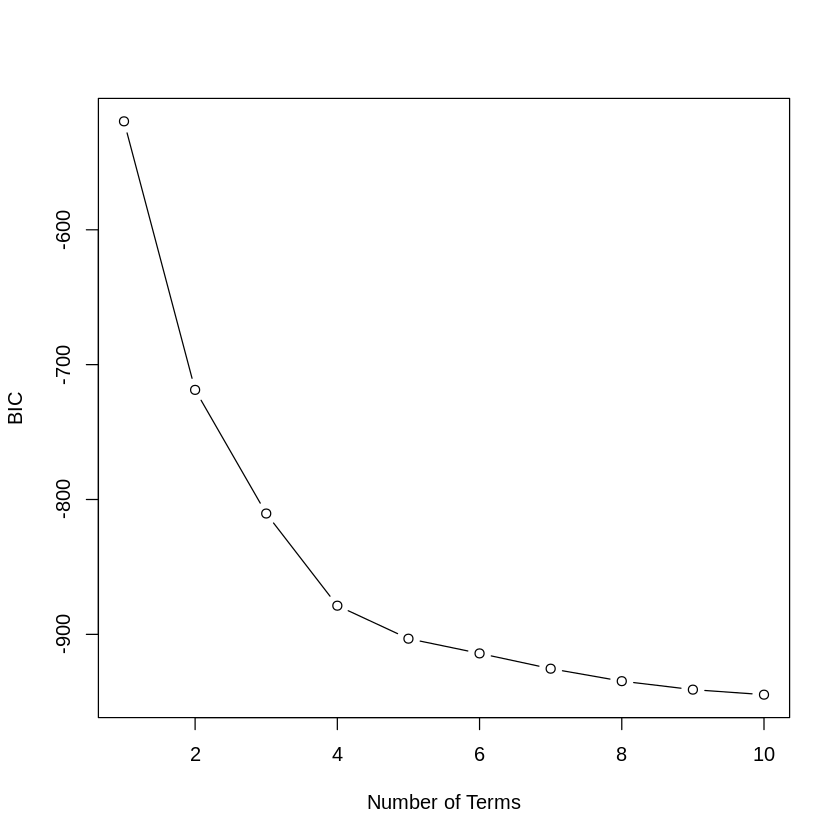

In [ ]:
plot(summary(LinearModel_DPFEAINSK_leaps)$bic, xlab="Number of Terms", ylab="BIC", type="b")

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 6)
plot(LinearModel_DPFEAINSK_leaps, scale="bic")
options(repr.plot.width = 7, repr.plot.height = 7)

## Getting a Final Model with 10 Predictors

In [ ]:
LinearModel_DPFEAINSK_Final_10Variables <- lm(DPFEAINSK ~
                                            DPETSPEP + DPSCTOFP + DPSXTOFP + DPSCTOSA + DPSTTOSA +
                                            DPSAMIFP +
                                            DPSAKIDR +
                                            DPSTKIDR +
                                            DPFVTOTK + DPFTADPR,
                                          data= TexasSchoolDistricts_Snapshot_Modeling_Reduced
                                )

In [ ]:
summary(LinearModel_DPFEAINSK_Final_10Variables)


Call:
lm(formula = DPFEAINSK ~ DPETSPEP + DPSCTOFP + DPSXTOFP + DPSCTOSA + 
    DPSTTOSA + DPSAMIFP + DPSAKIDR + DPSTKIDR + DPFVTOTK + DPFTADPR, 
    data = TexasSchoolDistricts_Snapshot_Modeling_Reduced)

Residuals:
    Min      1Q  Median      3Q     Max 
-4147.4  -378.9   -66.7   259.5 11383.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.840e+03  3.089e+02  22.143  < 2e-16 ***
DPETSPEP     2.877e+01  7.566e+00   3.803 0.000151 ***
DPSCTOFP     1.115e+02  2.174e+01   5.130 3.43e-07 ***
DPSXTOFP    -1.424e+01  4.362e+00  -3.264 0.001132 ** 
DPSCTOSA     5.199e-03  1.463e-03   3.553 0.000398 ***
DPSTTOSA     7.499e-02  5.687e-03  13.185  < 2e-16 ***
DPSAMIFP     6.329e+00  1.120e+00   5.652 2.04e-08 ***
DPSAKIDR    -3.277e+02  3.788e+01  -8.649  < 2e-16 ***
DPSTKIDR    -2.323e+02  2.092e+01 -11.105  < 2e-16 ***
DPFVTOTK     2.015e-04  3.978e-05   5.065 4.82e-07 ***
DPFTADPR    -3.361e+02  6.551e+01  -5.130 3.44e-07 ***
---
Signif. codes:  0 ‘**

In [ ]:
(TexasSchoolDistricts_Snapshot_Modeling_Reduced
  %>% mutate(Predicted_DPFEAINSK = predict(LinearModel_DPFEAINSK_Final_10Variables, newdata=TexasSchoolDistricts_Snapshot_Modeling_Reduced))
  %>% mutate(Residual_DPFEAINSK = (DPFEAINSK - Predicted_DPFEAINSK))
) -> TexasSchoolDistricts_Snapshot_Modeling_Reduced_withPredicted

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


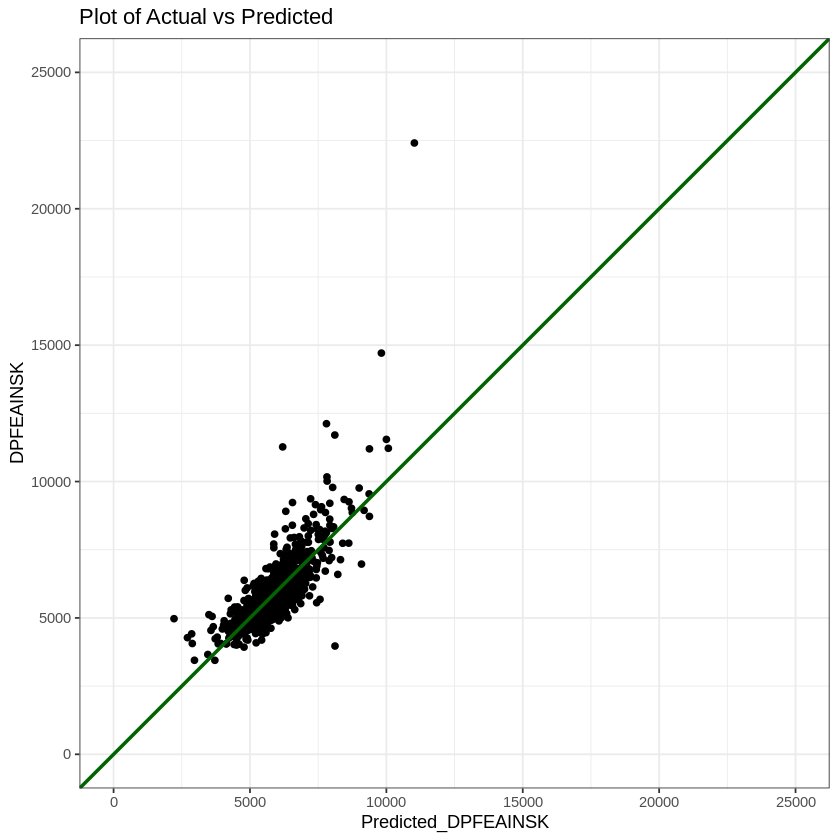

In [ ]:

#Scatterplot actual of Actual vs Predicted
ggplot(data=TexasSchoolDistricts_Snapshot_Modeling_Reduced_withPredicted, aes(x=Predicted_DPFEAINSK, y=DPFEAINSK)) +
  geom_point() +    #adding the points to the plot
  geom_abline(intercept = 0, slope = 1, col="darkgreen", linewidth=1) +   # adding a y=x reference line
 # geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  #adding a loess smoother to identify patterns

  # Deal with scaling the plot appropriately
  coord_fixed(ratio = 1) +    # Force the plot to be square, i.e. aspect ratio = 1
  xlim(0,25000) +            # Set the limits on the x-axis (should match the y-axis)
  ylim(0,25000) +            # Set the limits on the y-axis (should match the x-axis)

  ggtitle("Plot of Actual vs Predicted") +   #Add a title to the plot

  theme_bw()




---



---



---



In [ ]:
(data.frame(anova(LinearModel_DPFEAINSK_Backward_AIC))
  %>% filter(Pr..F. < 0.10)
)

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(car)

In [ ]:
data.frame(vif(LinearModel_DPFEAINSK_Final_10Variables))

vif.LinearModel_DPFEAINSK_Final_10Variables.
DPETSPEP 1.237059                                    
DPSCTOFP 1.654939                                    
DPSXTOFP 1.899255                                    
DPSCTOSA 1.653296                                    
DPSTTOSA 1.807430                                    
DPSAMIFP 1.670160                                    
DPSAKIDR 5.915326                                    
DPSTKIDR 5.393771                                    
DPFVTOTK 1.228638                                    
DPFTADPR 1.563365



---



---



End of Document

